<a href="https://colab.research.google.com/github/ThoaaPhann/AI_10_3_2023/blob/main/Control_of_DC_servo_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#--------------------Control_of_DC_servo_system--------------#

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=88bc7f47fbf89a3856b233d2c7cbe4c4b9436b7aff3142c21dcb68de133bff1d
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import matplotlib
import matplotlib.pyplot as plt

from skfuzzy.control.controlsystem import ControlSystemSimulation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.legend import time

Recommended v intake: 13.33


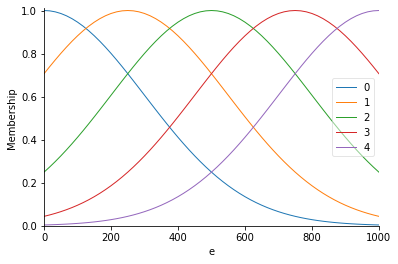

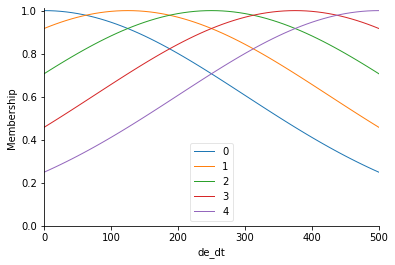

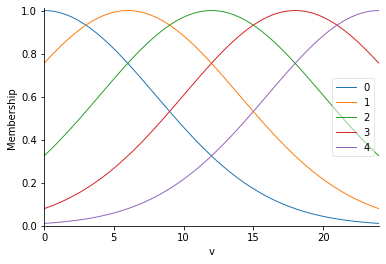

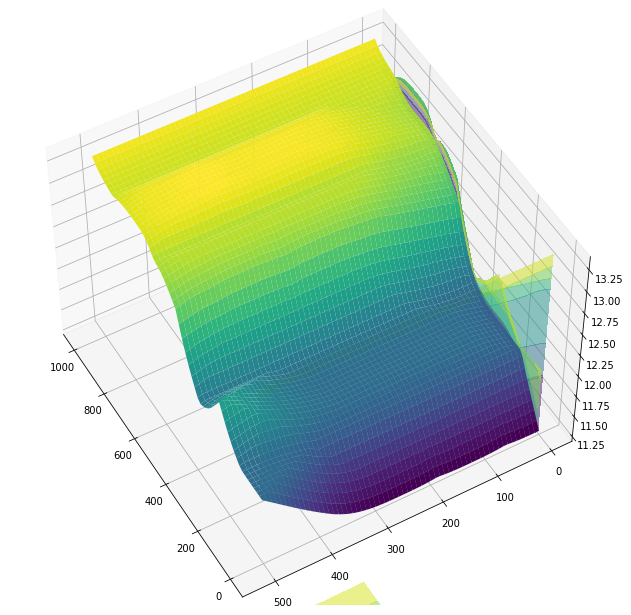

In [11]:
#Input and ouput 
universe = np.linspace(0,1000,61) 
universe1 = np.linspace(0,500,61)
universe2 = np.linspace(0,24,61)

e = ctrl.Antecedent(universe, 'e')
de_dt = ctrl.Antecedent(universe1, 'de_dt')
v = ctrl.Consequent(universe2, 'v')

# Set membership functions
e['0'] = fuzzy.gaussmf(e.universe,0,300)
e['1'] = fuzzy.gaussmf(e.universe,250,300)
e['2'] = fuzzy.gaussmf(e.universe,500,300)
e['3'] = fuzzy.gaussmf(e.universe,750,300)
e['4'] = fuzzy.gaussmf(e.universe,1000,300)

de_dt['0'] = fuzzy.gaussmf(de_dt.universe,0,300)
de_dt['1'] = fuzzy.gaussmf(de_dt.universe,125,300)
de_dt['2'] = fuzzy.gaussmf(de_dt.universe,250,300)
de_dt['3'] = fuzzy.gaussmf(de_dt.universe,375,300)
de_dt['4'] = fuzzy.gaussmf(de_dt.universe,500,300)

v['0'] = fuzzy.gaussmf(v.universe,0,8)
v['1'] = fuzzy.gaussmf(v.universe,6,8)
v['2'] = fuzzy.gaussmf(v.universe,12,8)
v['3'] = fuzzy.gaussmf(v.universe,18,8)
v['4'] = fuzzy.gaussmf(v.universe,24,8)

#Rule
rules = [ ctrl.Rule(antecedent=(e['0']&(de_dt['0']|de_dt['1']|de_dt['2']|e['1']|e['2'])), consequent=v['0']),

          ctrl.Rule(antecedent=(e['0']|e['1'])&(de_dt['0']|de_dt['1']|de_dt['2']|e['3']|e['2']), consequent=v['1']),

          ctrl.Rule(antecedent=(e['0']|e['1']|e['3'])&(de_dt['0']|de_dt['1']|de_dt['2']|de_dt['4']|e['2']), consequent=v['2']),

          ctrl.Rule(antecedent=(e['1']|e['2']|e['3'])&(de_dt['1']|de_dt['2']|de_dt['3']|e['4']), consequent=v['3']),

          ctrl.Rule(antecedent=(e['2']|e['3']|e['4'])&(de_dt['2']|de_dt['3']|de_dt['4']|e['4']), consequent=v['4'])]

# Create control system and simulate

e.view()
de_dt.view()
v.view()

System = ctrl.ControlSystem(rules)
sim = ctrl.ControlSystemSimulation(System, flush_after_run=61*61+1)
x, y = np.meshgrid(np.linspace(0, 1000, 61), np.linspace(0, 500, 61))
z = np.zeros_like(x)

for i, j in np.ndindex(x.shape): 
    sim.input['e'] = x[i, j]
    sim.input['de_dt'] = y[i, j]
    sim.compute()
    z[i, j] = sim.output['v']
print("Recommended v intake:", round(sim.output['v'], 2))

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                      linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset=6, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=6, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=6, cmap='viridis', alpha=0.5)
ax.view_init(50, 150)
